In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

from catboost import CatBoostClassifier
from matplotlib import pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from pprint import pprint
from warnings import filterwarnings
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

filterwarnings("ignore", category=FutureWarning)

In [4]:
data = pd.read_csv('C:/Users/КАТЕНОК/Desktop/Kaggle/Telecom 2021 stepik/advanced-dls-spring-2021/train.csv')
test = pd.read_csv('C:/Users/КАТЕНОК/Desktop/Kaggle/Telecom 2021 stepik/advanced-dls-spring-2021/test.csv')

In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent',
    'IsSeniorCitizen'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn' 

In [6]:
data[:10]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
5,25,19.80,475.2,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
6,27,90.15,2423.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
7,1,45.70,45.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
9,72,61.20,4390.25,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [11]:
data.loc[data['TotalSpent'] == "", "TotalSpent"] = np.NaN
data.loc[data['TotalSpent'] == " ", "TotalSpent"] = np.NaN

In [12]:
data.isna().sum().to_frame()

,0
ClientPeriod,0
MonthlySpending,0
TotalSpent,9
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


Смотрим клиентов с Nan:

In [13]:
data.sort_values("TotalSpent").tail(9) #Смотрим клиентов с Nan

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,NaN,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,NaN,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,NaN,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,NaN,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,NaN,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


Видно, что это новые клиенты в компании (ClientPeriod = 0), поэтому заменим TotalSpent на 0.

In [14]:
data["TotalSpent"] = data.TotalSpent.fillna(0).astype(float)
test["TotalSpent"] = data.TotalSpent.fillna(0).astype(float)

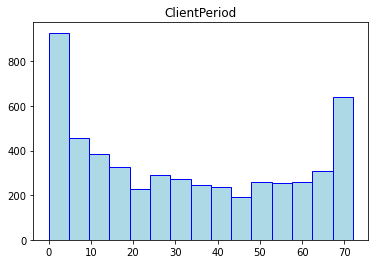

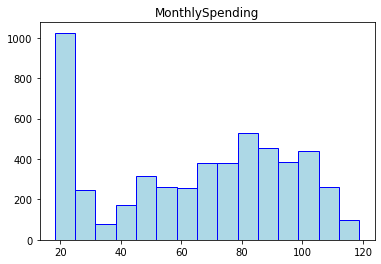

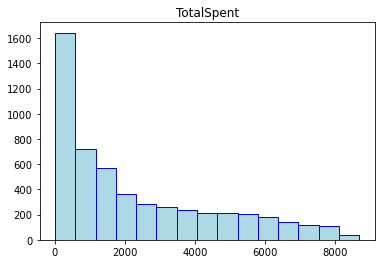

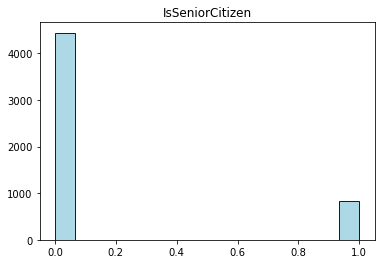

In [15]:
for col in num_cols:
    plt.figure()
    plt.hist(data[col], color = "lightblue", ec="blue", bins=15)
    plt.title(col)
    plt.show()

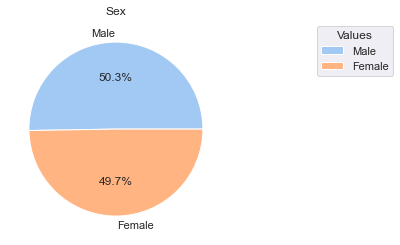

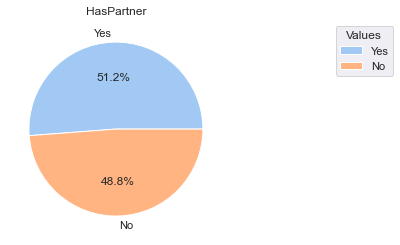

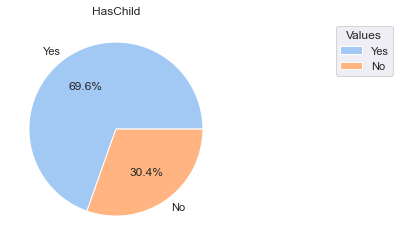

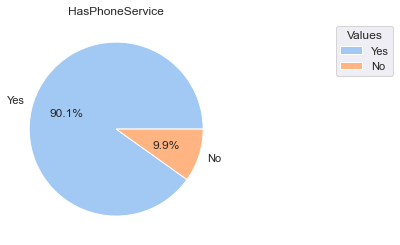

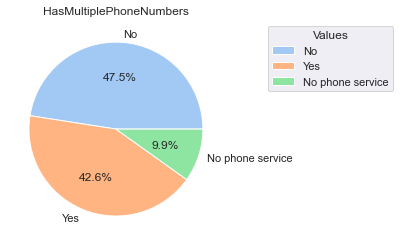

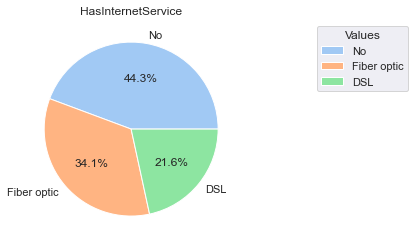

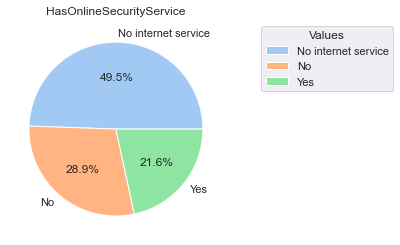

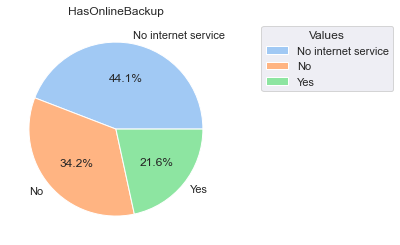

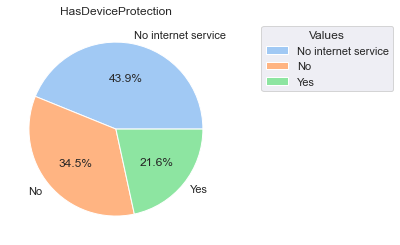

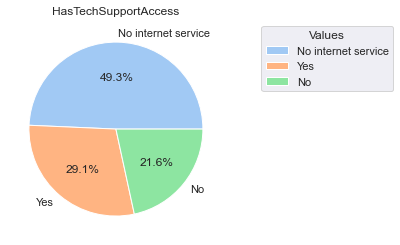

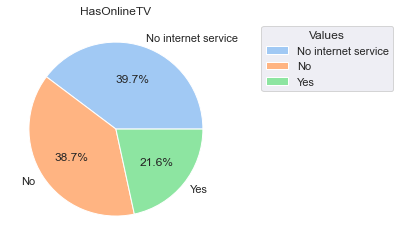

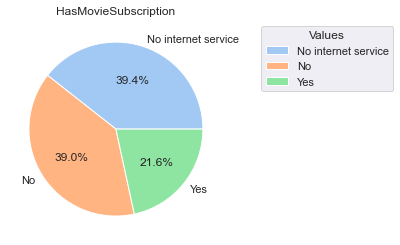

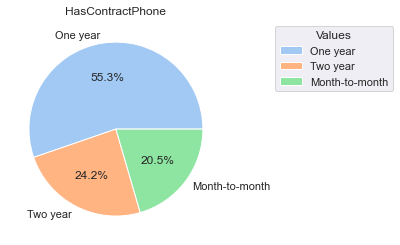

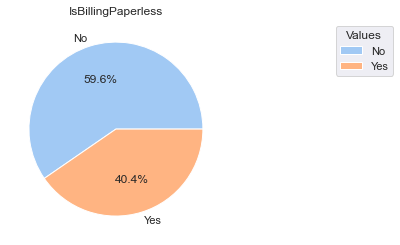

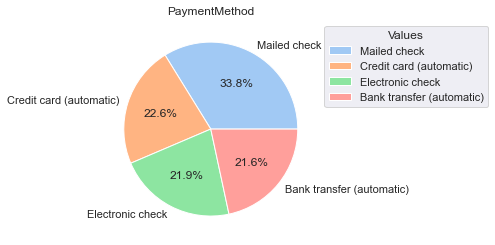

In [16]:

for col in cat_cols:
    labe = data[col].unique()
    sns.set(rc={'figure.figsize': (4, 4)})
    colors = sns.color_palette('pastel')
    plt.pie(data[col].value_counts(), labels = labe, autopct='%1.1f%%', colors = colors)
    plt.legend(title="Values", loc="upper right", bbox_to_anchor=(1.3, 0, 0.5, 1))
    plt.title(col)
    plt.show()
    

<b> Логистическая регрессия </b>

Обработаем данные для того, чтобы к ним можно было применить LogisticRegression.
(Отнормируем числовые признаки, а категориальные закодируем с помощью one-hot-encoding)

In [17]:
num_data = data[num_cols]
cat_data = data[cat_cols]

y = data['Churn']
data = data.drop(columns = ['Churn'])

In [18]:
numeric_transformer = StandardScaler()
cat_transformer = make_pipeline(OneHotEncoder())

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ],
)
alg  = make_pipeline(preprocessor, LogisticRegression(max_iter=1000, solver="saga", penalty = 'l2'))

Протестируйте разные значения гиперпараметра С и выберем лучший по метрике ROC-AUC:

In [19]:
param_grid = {
    'logisticregression__C': [100, 10, 5, 1, 0.1, 0.01, 0.001],
}
# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

# Создаем GridSearchCV объект
grid_search_logreg = GridSearchCV(alg, 
                           param_grid, 
                           scoring='roc_auc', 
                           cv=10,
                          refit=True)

In [20]:
grid_search_logreg.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent',
                                                                          'IsSeniorCitizen']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder())]),
                                                                         ['Sex',
    

In [21]:
print("Лучший параметр C:", grid_search_logreg.best_params_)
print("ROC-AUC на обучающей выборке:", roc_auc_score(y_train, grid_search_logreg.predict_proba(X_train)[:, 1]))
print("ROC-AUC на тестовой выборке:", roc_auc_score(y_test, grid_search_logreg.predict_proba(X_test)[:, 1]))

Лучший параметр C: {'logisticregression__C': 5}
ROC-AUC на обучающей выборке: 0.8536617430240021
ROC-AUC на тестовой выборке: 0.8280954184021203


In [22]:
best_model = grid_search_logreg.best_estimator_
submission = pd.DataFrame({'Id': test.index, 'Churn': best_model.predict_proba(test)[:, 1]})
submission.to_csv('./my_submission.csv', index=False)
submission

,Id,Churn
0,0,0.025917
1,1,0.667327
2,2,0.645375
3,3,0.002804
4,4,0.006106
...,...,...
1756,1756,0.094360
1757,1757,0.061334
1758,1758,0.792869
1759,1759,0.566729


<b> Градиентный бустинг </b>

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

catboost = CatBoostClassifier(
                learning_rate=1, 
                loss_function='Logloss',
                metric_period=1000, 
                cat_features=cat_cols,
                early_stopping_rounds=10)
    #logging_level="Silent",
    #eval_metric="AUC:hints=skip_train~false",
    #grow_policy="Lossguide",
    #random_seed=42,
    #loss_function='CrossEntropy',



param_grid_catboost = {
    "n_estimators": [300, 500, 700, 1000],  # [5, 10, 20, 30, 40, 50, 70, 100, 150, 200, 250, 300, 500, 1000],
    "learning_rate": [0.05],  # [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02, 0.04, 0.05, 0.1, 0.2, 0.3, 0.5],
    "max_depth": [4],  # np.arange(4, 20, 1),
    "l2_leaf_reg": [10],  # np.arange(0.1, 1, 0.05),
    "subsample": [0.6],  # [3, 5, 7, 10],
    "min_data_in_leaf": [100],  # np.arange(10, 1001, 10),
}

grid_search_catboost = GridSearchCV(catboost, 
                               param_grid_catboost, 
                               scoring='roc_auc', 
                                cv=10,
                              refit=True)



In [39]:
grid_search_catboost.fit(X_train, y_train)

0:	learn: 0.6642644	total: 25.2ms	remaining: 7.52s
299:	learn: 0.3745686	total: 8.4s	remaining: 0us
0:	learn: 0.6651477	total: 34.7ms	remaining: 10.4s
299:	learn: 0.3756531	total: 10.3s	remaining: 0us
0:	learn: 0.6651939	total: 28.2ms	remaining: 8.43s
299:	learn: 0.3782528	total: 9.95s	remaining: 0us
0:	learn: 0.6633971	total: 35ms	remaining: 10.5s
299:	learn: 0.3724861	total: 9.71s	remaining: 0us
0:	learn: 0.6642159	total: 28.6ms	remaining: 8.54s
299:	learn: 0.3783176	total: 9.31s	remaining: 0us
0:	learn: 0.6694290	total: 27.6ms	remaining: 8.25s
299:	learn: 0.3788606	total: 9.61s	remaining: 0us
0:	learn: 0.6699157	total: 29.3ms	remaining: 8.75s
299:	learn: 0.3826492	total: 9.49s	remaining: 0us
0:	learn: 0.6681065	total: 31ms	remaining: 9.26s
299:	learn: 0.3780520	total: 9.7s	remaining: 0us
0:	learn: 0.6682216	total: 27.9ms	remaining: 8.34s
299:	learn: 0.3790283	total: 9.5s	remaining: 0us
0:	learn: 0.6677058	total: 33.9ms	remaining: 10.1s
299:	learn: 0.3797630	total: 9.65s	remaining: 0

GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000016DDAC58400>,
             param_grid={'l2_leaf_reg': [10], 'learning_rate': [0.05],
                         'max_depth': [4], 'min_data_in_leaf': [100],
                         'n_estimators': [300, 500, 700, 1000],
                         'subsample': [0.6]},
             scoring='roc_auc')

In [40]:
print("ROC-AUC на обучающей выборке:", roc_auc_score(y_train, grid_search_catboost.predict_proba(X_train)[:, 1]))
print("ROC-AUC на тестовой выборке:", roc_auc_score(y_test, grid_search_catboost.predict_proba(X_test)[:, 1]))

ROC-AUC на обучающей выборке: 0.8775455746642957
ROC-AUC на тестовой выборке: 0.8254656865008635


In [41]:
best_model = grid_search_logreg.best_estimator_
submission_catboost = pd.DataFrame({'Id': test.index, 'Churn': best_model.predict_proba(test)[:, 1]})
submission_catboost.to_csv('./my_submission.csv', index=False)
submission_catboost

,Id,Churn
0,0,0.025917
1,1,0.667327
2,2,0.645375
3,3,0.002804
4,4,0.006106
...,...,...
1756,1756,0.094360
1757,1757,0.061334
1758,1758,0.792869
1759,1759,0.566729
